# NLP Primer - [ spaCy Basics ]

<div class="alert alert-block alert-info">
<b>What is NLP?</b>


NLP stands for Natural Language Processing, which is a subfield of computer science and artificial intelligence that focuses on enabling computers to understand, interpret, and generate human language.

NLP involves developing algorithms and computational models that can analyze, process, and manipulate natural language data, such as text, speech, and other forms of communication.
</div>

<div class="alert alert-block alert-info">
<b>What is spaCy?</b>

Spacy is a free, open-source library for advanced natural language processing (NLP) in Python. It was created by Matthew Honnibal and Ines Montani and is designed to be fast, efficient, and production-ready.

Spacy provides a range of tools and models for various NLP tasks, such as tokenization, part-of-speech tagging, named entity recognition, dependency parsing, text classification, and more. It also provides pre-trained models for multiple languages that can be easily loaded and used out-of-the-box.

One of the key features of Spacy is its efficient and scalable design, which allows it to process large amounts of text quickly and accurately. It also provides a user-friendly API and integrates with other popular Python libraries, such as NumPy and Pandas.
</div>

___

# Installation and Setup

### Installation
> `pip install -U spacy`

### GPU Installation

> `pip install -U spacy[cuda_version]` #Specify the cuda version <br>
> `spacy.prefer_gpu()`   # activate gpu

### Language Model Download

> `!python -m spacy download en_core_web_sm`

## Available Language Models

1. __`en_core_web_sm`__ : English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer. 
2. __`en_core_web_md`__ : English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.
3. __`en_core_web_lg`__ : English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.
4. __`en_core_web_trf`__ : English transformer pipeline (roberta-base). Components: transformer, tagger, parser, ner, attribute_ruler, lemmatizer.

___

# Getting Started with spaCy

## Tokenization
<div class="alert alert-block alert-info">
<b>Tokenization</b> is the process of breaking down a text document into individual tokens, which are usually words or punctuation marks. 
    
In Spacy, tokenization is the first step in the NLP pipeline, and involves splitting the text into a sequence of tokens that can be further analyzed and processed by subsequent pipeline components.
</div>

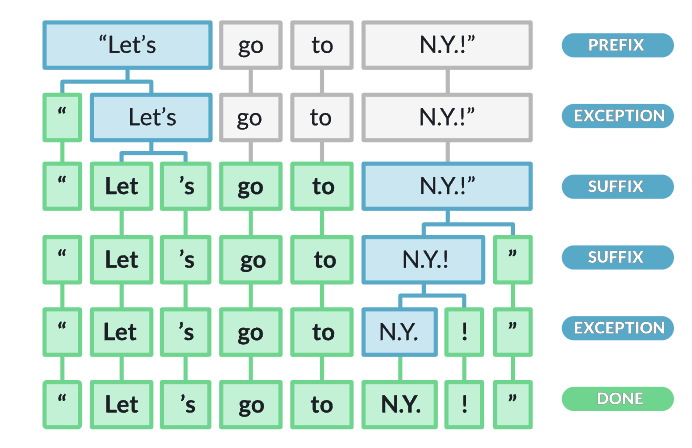

In [1]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(u'Apple is looking at buying U.K. startup for $1 billion')

# Print each token separately
for token in doc:
    print(token)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


In [2]:
# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup NOUN dep
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


In [3]:
# Total number odf tokens inside the doc
len(doc)

11

In [4]:
# Vocab of the language model being used
len(doc.vocab)

773

> <font color=green>`NOTE:` This number changes based on the language library loaded at the start, and any new lexemes introduced to the `vocab` when the `Doc` was created.</font><br>

> <font color=green>Doc objects can be thought of as lists of token objects. As such, individual tokens can be retrieved by index position, and spans of tokens can be retrieved through slicing

In [5]:
doc[5]

U.K.

In [6]:
doc[2:7]

looking at buying U.K. startup

## Stemming
<div class="alert alert-block alert-info">
<b>Stemming</b> is the process of reducing a word to its base or root form, which is called the stem. The goal of stemming is to remove suffixes and prefixes from words in order to improve information retrieval and text analysis by reducing different word forms to a common base form.
    
Stemming algorithms typically apply a set of rules or heuristics to remove common suffixes and prefixes from words. However, stemming algorithms are not always perfect and can sometimes produce stem forms that are not actual words or are incorrect in certain contexts.
    
<b>Example: </b> "boat" would be the stem for [boat, boater, boating, boats].<br>
    
    
<b>NOTE : Spacy doesn't provide stemming as one of its default features. However, you can use third-party libraries like NLTK (Natural Language Toolkit) to perform stemming in Python.</b>
</div>

In [7]:
# Based on Porters Algorithm
from nltk.stem.porter import PorterStemmer

# Slight improvement over Porter Stemmer a.k.a Porter Stemmer 2
from nltk.stem.snowball import SnowballStemmer

In [8]:
p_stemmer = PorterStemmer()
s_stemmer = SnowballStemmer(language='english')

In [9]:
words = ['run','runner','jumping', 'jumper','running','ran','runs','easily','fairly']

In [10]:
for word in words:
    print(f"{word} --> Porter: {p_stemmer.stem(word)} --> Snowball: {s_stemmer.stem(word)}")

run --> Porter: run --> Snowball: run
runner --> Porter: runner --> Snowball: runner
jumping --> Porter: jump --> Snowball: jump
jumper --> Porter: jumper --> Snowball: jumper
running --> Porter: run --> Snowball: run
ran --> Porter: ran --> Snowball: ran
runs --> Porter: run --> Snowball: run
easily --> Porter: easili --> Snowball: easili
fairly --> Porter: fairli --> Snowball: fair


## Lemmatization
<div class="alert alert-block alert-info">
<b>Lemmatization</b> is the process of reducing a word to its base or dictionary form, which is called the lemma. The goal of lemmatization is to transform words into a canonical form that represents their meaning and can be easily compared or analyzed.
    
Unlike stemming, which applies a set of rules or heuristics to remove suffixes and prefixes from words, lemmatization uses a knowledge base such as a dictionary or a corpus of texts to determine the lemma of a word. This means that lemmatization can produce more accurate and meaningful results than stemming.
    
It looks beyond word reduction, and considers a language's full vocabulary to apply a morphological analysis to words.
    
<b>Example: </b> "boat" would be the stem for [boat, boater, boating, boats].
</div>

In [11]:
# English pipelines include a rule-based lemmatizer
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")
print(lemmatizer.mode)  # 'rule'

rule


In [12]:
doc = nlp("I was reading the paper.")
print([token.lemma_ for token in doc])

['I', 'be', 'read', 'the', 'paper', '.']


In [13]:
for token in doc:
    print(f"{token.text} --> {token.lemma_}")

I --> I
was --> be
reading --> read
the --> the
paper --> paper
. --> .


In [14]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(f"{token.text} --> {token.lemma_}")

Apple --> Apple
is --> be
looking --> look
at --> at
buying --> buy
U.K. --> U.K.
startup --> startup
for --> for
$ --> $
1 --> 1
billion --> billion


## Stopwords
<div class="alert alert-block alert-info">
<b>Stopwords</b> are common words that are typically removed from text data during natural language processing, as they do not carry much meaning or contribute to the overall understanding of the text. Examples of stopwords in English include "the", "a", "an", "and", "or", "of", and "to".
    
In Spacy, the list of stopwords is language-specific and can be accessed through the stop_words attribute of the Language class. The list of stopwords for a given language can be retrieved by calling the <b>"Language.Defaults.stop_words"<b>
    
</div>

In [15]:
# TOtal number of stopwords 
len(nlp.Defaults.stop_words)

326

In [16]:
# Print the first 10 stopwords
print(list(nlp.Defaults.stop_words)[:10])

['six', 'made', 'thereupon', 'that', 'whose', 'here', 'its', 'yet', 'others', 'same']


In [17]:
# Print the tokens that are not stopwords
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    if not token.is_stop:
        print(token.text)

Apple
looking
buying
U.K.
startup
$
1
billion


___

## spaCy pipeline

<div class="alert alert-block alert-info">
When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. <br>

The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.<br>
    
When a text document is processed by Spacy, it goes through each component in the pipeline in order. Each component takes the output of the previous component and applies its own processing steps to the text. This process continues until the end of the pipeline is reached and the final processed document is returned.
</div>   

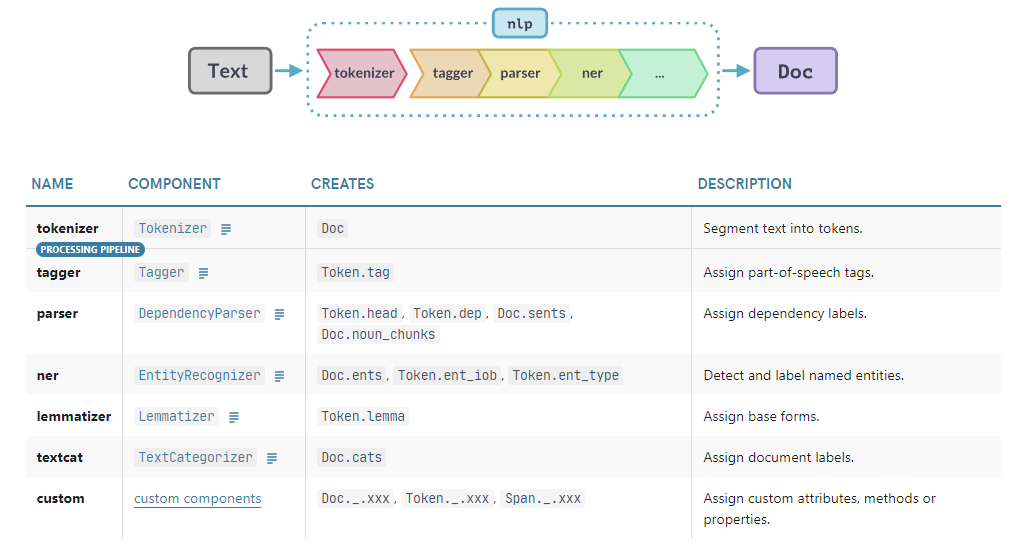    

In [18]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x23cdae19880>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x23cdb01c0a0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x23cdae1c6d0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x23cdb0318c0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x23cdb00fbc0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x23cdae1c350>)]

In [19]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

### Disabling, excluding and modifying pipeline components

In [20]:
nlp = spacy.load("en_core_web_sm")
print(nlp.pipe_names)

# Load the pipeline without the entity recognizer
nlp = spacy.load("en_core_web_sm", exclude=["ner"])
print(nlp.pipe_names)

# Load the tagger and parser but don't enable them
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser"])
print(nlp.pipe_names)

# Load the complete pipeline, but disable all components except for tok2vec and tagger
nlp = spacy.load("en_core_web_sm", enable=["tok2vec", "tagger"])
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']
['tok2vec', 'attribute_ruler', 'lemmatizer', 'ner']
['tok2vec', 'tagger']


___

In [21]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN dep xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False
